# Peptides

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
peptides_data = pd.read_csv('./data/train_peptides.csv')
peptides_data.head(2)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0


In [3]:
display(peptides_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


None

In [4]:
print(f'records: {len(peptides_data)}')

unique_visits = len(peptides_data['visit_id'].unique())
print(f'Unique visits: {unique_visits}')
unique_peptides = len(peptides_data['Peptide'].unique())
print(f'Unique peptides: {unique_peptides}')

unique_patients = len(peptides_data['patient_id'].unique())
print(f'Unique patients: {unique_patients}')

visit_min = peptides_data['visit_month'].min()
visit_max = peptides_data['visit_month'].max()
print(f'Visit month range: ({visit_min}, {visit_max})')

unique_proteins = len(peptides_data['UniProt'].unique())
print(f'Unique proteins: {unique_proteins}')


records: 981834
Unique visits: 1113
Unique peptides: 968
Unique patients: 248
Visit month range: (0, 108)
Unique proteins: 227


In [5]:
peptides_data.describe()

,visit_month,patient_id,PeptideAbundance
count,981834.000000,981834.000000,9.818340e+05
mean,26.105061,32603.465361,6.428902e+05
std,22.913897,18605.934422,3.377989e+06
min,0.000000,55.000000,1.099850e+01
25%,6.000000,16566.000000,2.817425e+04
50%,24.000000,29313.000000,7.430830e+04
75%,48.000000,49995.000000,2.213388e+05
max,108.000000,65043.000000,1.787520e+08


In [6]:
# This indicates that every peptide is mapped to one single (parent) protein
peptides_data.groupby('Peptide')['UniProt'].nunique()

Peptide
AADDTWEPFASGK                                       1
AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K    1
AAFTEC(UniMod_4)C(UniMod_4)QAADK                    1
AANEVSSADVK                                         1
AATGEC(UniMod_4)TATVGKR                             1
                                                   ..
YVNKEIQNAVNGVK                                      1
YWGVASFLQK                                          1
YYC(UniMod_4)FQGNQFLR                               1
YYTYLIMNK                                           1
YYWGGQYTWDMAK                                       1
Name: UniProt, Length: 968, dtype: int64

<AxesSubplot: >

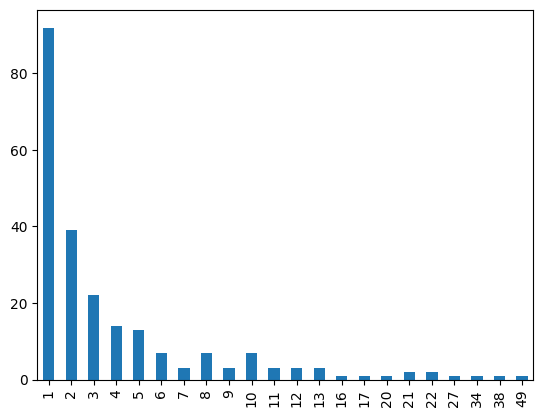

In [7]:
# This indicates a lot of proteins have multiple peptides associated with it
peptides_data.groupby('UniProt')['Peptide'].nunique().value_counts().sort_index().plot.bar()

In [8]:
peptides_data.groupby('UniProt')['Peptide'].nunique().sort_values(ascending=False)

UniProt
P02787    49
P02768    38
P01024    34
P02751    27
P02774    22
          ..
P08253     1
P08133     1
P08123     1
P07858     1
P09104     1
Name: Peptide, Length: 227, dtype: int64

In [9]:
peptite_protein_features = peptides_data.pivot_table(index='visit_id', columns='UniProt', values='PeptideAbundance', aggfunc=sum)
peptite_protein_features

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.40,NaN,NaN,7150.57,2497.84,83002.900,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.00,177983.30,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435585.70,NaN,NaN,NaN,NaN,197116.600,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.00,171733.40,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507385.80,7126.96,24525.7,NaN,2372.71,126505.600,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.66,245187.96,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494580.50,9165.06,27193.5,22506.09,6015.90,156313.490,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.90,36927.69,229231.31,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522137.30,4498.51,17189.8,29112.40,2665.15,151169.551,52338.1,240892.0,85767.1,...,NaN,47836.80,177619.0,17061.10,25510.40,176722.39,59471.4,12639.2,15091.40,6168.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,9983.00,400289.70,24240.11,NaN,16943.44,6303.17,77493.638,46435.3,254247.0,138910.0,...,NaN,25690.65,NaN,6859.82,19106.77,121161.10,113872.0,14413.9,28225.50,8062.07
942_12,6757.32,360858.60,18367.55,14760.7,18603.42,1722.77,86847.366,37741.3,212132.0,100519.0,...,45742.3,33518.60,94049.7,13415.70,21324.70,234094.44,82410.4,19183.7,17804.10,12277.00
942_24,NaN,352722.80,22834.93,23393.1,16693.51,1487.91,114772.110,36095.7,185836.0,99183.5,...,180475.0,29770.60,95949.9,11344.40,23637.66,256653.89,76931.9,19168.2,19215.90,14625.58


**NPX = sum of PeptideAbundance**

In [10]:
peptides_data.groupby('visit_id')['Peptide'].count().value_counts().sort_index(ascending=False).head(10)

947    1
946    1
945    1
944    5
943    2
942    1
941    1
940    1
939    3
938    3
Name: Peptide, dtype: int64

This tells that, not all peptides are measured at any point of time.

In [11]:
peptides_data.groupby('visit_id')['Peptide'].count().describe()

count    1113.000000
mean      882.150943
std        69.156328
min        94.000000
25%       878.000000
50%       903.000000
75%       917.000000
max       947.000000
Name: Peptide, dtype: float64

In [12]:
peptide_features = peptides_data.pivot(index=['patient_id','visit_month'], columns='Peptide', values='PeptideAbundance')
peptide_features

Peptide                 AADDTWEPFASGK  \
patient_id visit_month                  
55         0                8984260.0   
           6                8279770.0   
           12               8382390.0   
           36              10671500.0   
942        6                6177730.0   
...                               ...   
64674      84               7083630.0   
65043      0                7818630.0   
           12               8070390.0   
           24               7608150.0   
           48               7187220.0   

Peptide                 AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
patient_id visit_month                                                     
55         0                                                     53855.6   
           6                                                     45251.9   
           12                                                    53000.9   
           36                                                    58108.4   
942        6                                                     42682.6   
...                                                                  ...   
64674      84                                                    35656.1   
65043      0                                                     95033.0   
           12                                                    76532.7   
           24                                                    75401.6   
           48                                                    72262.2   

Peptide                 AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  \
patient_id visit_month                                                  
55         0                                   8579740.0          NaN   
           6                                   8655890.0      49927.5   
           12                                  8995640.0      45519.2   
           36                                  9985420.0      52374.0   
942        6                                   3596660.0      25698.8   
...                                                  ...          ...   
64674      84                                  6273100.0          NaN   
65043      0                                   5119260.0      57483.7   
           12                                  8233520.0      54260.6   
           24                                  9168030.0          NaN   
           48                                  8551210.0          NaN   

Peptide                 AATGEC(UniMod_4)TATVGKR  AATVGSLAGQPLQER  \
patient_id visit_month                                             
55         0                            19735.4         114400.0   
           6                            23820.4          90539.4   
           12                           17813.5         147312.0   
           36                           19373.3          64356.1   
942        6                            17130.6          86471.5   
...                                         ...              ...   
64674      84                               NaN          15479.2   
65043      0                            11610.0         270739.0   
           12                           11631.9         230169.0   
           24                           13313.9         220202.0   
           48                           12365.3         197981.0   

Peptide                 AAVYHHFISDGVR  ADDKETC(UniMod_4)FAEEGK  \
patient_id visit_month                                           
55         0                  46371.1                  70412.0   
           6                  38652.4                  63052.4   
           12                 45840.9                  72325.0   
           36                 49793.2                 537430.0   
942        6                  41007.9                  63761.4   
...                               ...                      ...   
64674      84                     NaN                  32935.4   
65043      0                  42527.3           

In [13]:
print(f'{100*peptide_features.isna().sum().sum()/peptide_features.size:.2f}% are nan values')

8.87% are nan values


In [13]:
peptide_features.fillna(peptide_features.mean(), inplace=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_peptide = scaler.fit_transform(peptide_features)

Keep 216 components in PCA


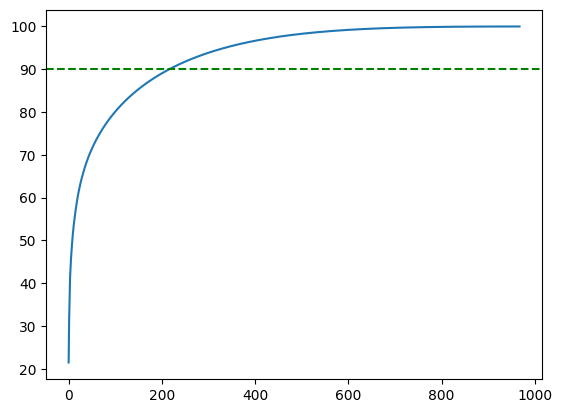

In [ ]:
pca = PCA(random_state=42)
X_pca = pca.fit_transform(scaled_peptide)
cumsum_var = 100 * np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum_var)
perc_retained = 90
plt.axhline(perc_retained, color='g', linestyle='--')
print(f"Keep {np.argmax(cumsum_var > perc_retained)} components in PCA")

In [ ]:
pca = PCA(n_components = 216, random_state=42)
X_pca = pca.fit_transform(scaled_peptide)
X_pca.shape

(1113, 216)

In [40]:
peptide_features.query('patient_id == 65043')

Peptide                 AADDTWEPFASGK  \
patient_id visit_month                  
65043      0                7818630.0   
           12               8070390.0   
           24               7608150.0   
           48               7187220.0   

Peptide                 AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
patient_id visit_month                                                     
65043      0                                                     95033.0   
           12                                                    76532.7   
           24                                                    75401.6   
           48                                                    72262.2   

Peptide                 AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  \
patient_id visit_month                                                  
65043      0                                   5119260.0      57483.7   
           12                                  8233520.0      54260.6   
           24                                  9168030.0          NaN   
           48                                  8551210.0          NaN   

Peptide                 AATGEC(UniMod_4)TATVGKR  AATVGSLAGQPLQER  \
patient_id visit_month                                             
65043      0                            11610.0         270739.0   
           12                           11631.9         230169.0   
           24                           13313.9         220202.0   
           48                           12365.3         197981.0   

Peptide                 AAVYHHFISDGVR  ADDKETC(UniMod_4)FAEEGK  \
patient_id visit_month                                           
65043      0                  42527.3                 390412.0   
           12                 42255.5                 441297.0   
           24                 46914.1                 529563.0   
           48                 42311.3                 446770.0   

Peptide                 ADDKETC(UniMod_4)FAEEGKK  ADDLGKGGNEESTKTGNAGSR  ...  \
patient_id visit_month                                                   ...   
65043      0                           4209230.0                46225.1  ...   
           12                          4386040.0                43775.4  ...   
           24                          5542360.0                30188.3  ...   
           48                          5020860.0                36490.0  ...   

Peptide                 YSLTYIYTGLSK  YTTEIIK  YVGGQEHFAHLLILR  \
patient_id visit_month                                           
65043      0                257361.0  18316.6        2514660.0   
           12               230437.0  16703.2        2481560.0   
           24               251228.0  18326.2        2939460.0   
           48               233567.0  14478.3        3185530.0   

Peptide                 YVM(UniMod_35)LPVADQDQC(UniMod_4)IR  \
patient_id visit_month                                        
65043      0                                        51444.6   
           12                                       44405.0   
           24                                       50588.2   
           48                                       48793.0   

Peptide                 YVMLPVADQDQC(UniMod_4)IR  YVNKEIQNAVNGVK  YWGVASFLQK  \
patient_id visit_month                                                         
65043      0                            530245.0        156148.0    157548.0   
           12                           543391.0        159828.0    161207.0   
           24                           597869.0        148032.0    192857.0   
           48                           501159.0        133992.0    170146.0   

Peptide                 YYC(UniMod_4)FQGNQFLR  YYTYLIMNK  YYWGGQYTWDMAK  
patient_id visit_month                                                   
65043      0                         336625.0    48423.2        10915.8  
           12                        330337.0    45368.1        19023.2  
           24    

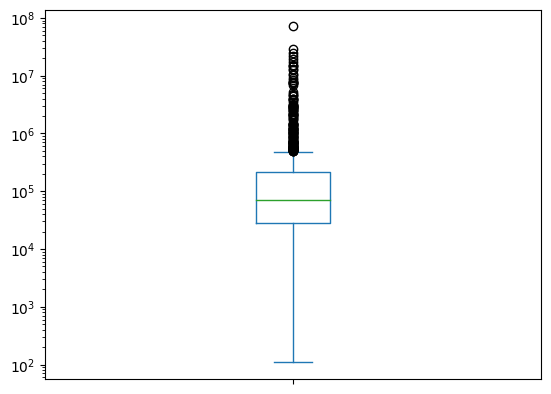

In [66]:
peptide_features.mean().plot.box()
plt.yscale('log')

In [76]:
peptide_corr = peptide_features.corr()

<AxesSubplot: xlabel='Peptide', ylabel='Peptide'>

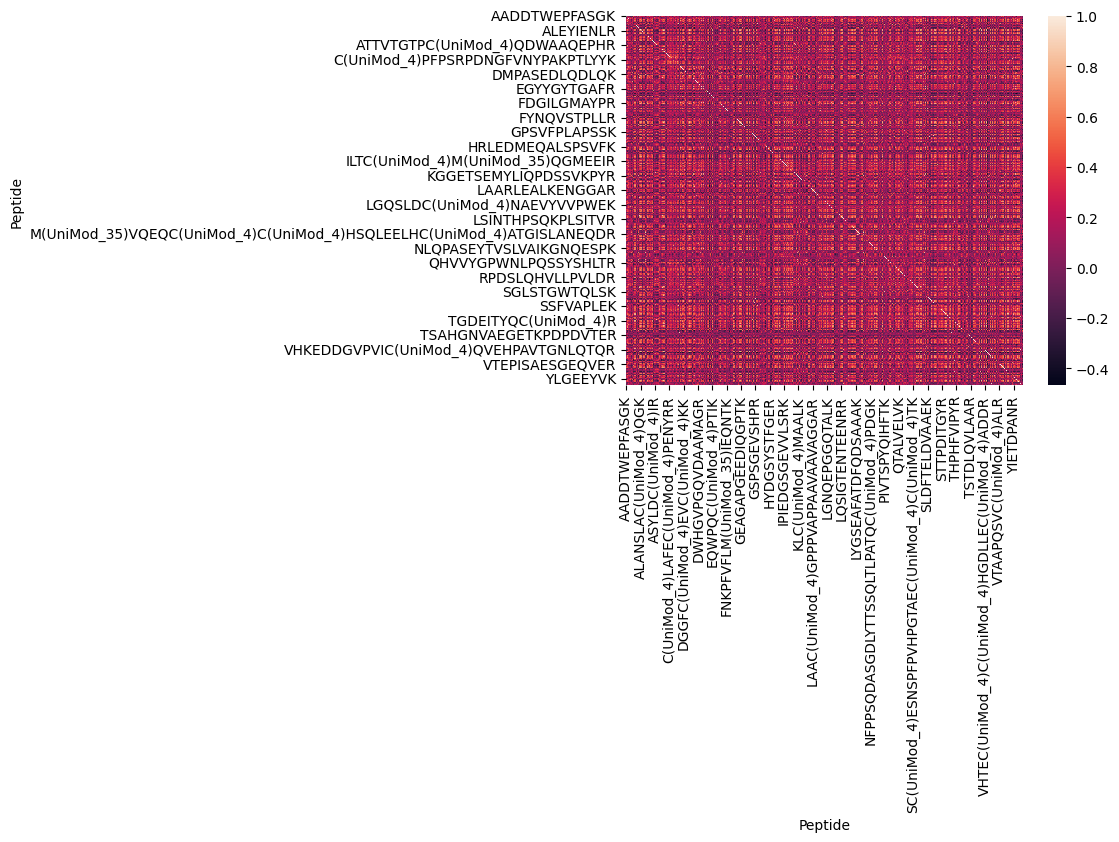

In [78]:
sns.heatmap(peptide_corr)

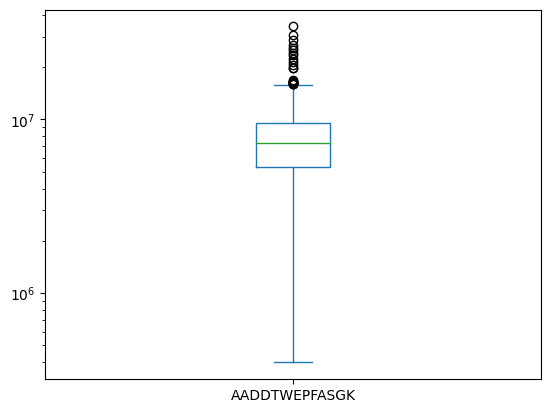

In [74]:
peptide_features['AADDTWEPFASGK'].plot.box()
plt.yscale('log')

In [41]:
patient_var = peptide_features.groupby('patient_id').std().mean()
month_var = peptide_features.groupby('visit_month').std().mean()
print((month_var/patient_var).mean())

1.6937201062185367


In [37]:
print("Total nan values: ", peptide_features.isna().sum().sum())
peptide_features.isna().sum().sort_values(ascending=False).to_frame().T

Total nan values:  95550


Peptide,QALPQVR,EPQVYTLPPSRDELTK,TPSGLYLGTC(UniMod_4)ER,SLEDQVEMLR,HYEGSTVPEK,VPEEDLKR,VAPDEHPILLTEAPLNPK,LTASAPGYLAITK,QQLVETHMAR,ALVQQMEQLR,...,VVEQMC(UniMod_4)ITQYER,KC(UniMod_4)STSSLLEAC(UniMod_4)TFR,IYLYTLNDNAR,ADQVC(UniMod_4)INLR,TATSEYQTFFNPR,TLLSNLEEAK,AIGYLNTGYQR,NILTSNNIDVK,KYLYEIAR,IPTTFENGR
0,624,550,523,514,508,507,497,494,492,482,...,1,1,1,1,1,0,0,0,0,0


8.86% of nan values are present which are easier to fill.